# Question 1

### Use the data for the breakfast cereals example in Section 4.8.1 to explore and summarize the data as follows:

a. Which variables are quantitative/numerical? Which are
ordinal? Which are nominal?

b. Compute the mean, median, min, max, and standard deviation for each of the quantitative variables.

c. Plot a histogram for each of the quantitative variables. Based on the histograms and summary statistics, answer the following questions:

i. Which variables have the largest variability?

ii. Which variables seem skewed?

iii. Are there any values that seem extreme?

d. Plot a side-by-side boxplot comparing the calories in hot vs. cold cereals. What does this plot show us?

e. Plot a side-by-side boxplot of consumer rating as a function of the shelf height. If we were to predict consumer rating from shelf height, does it appear that we need to keep all three categories of shelf height?

f. Compute the correlation table for the quantitative variable (method corr()). In addition, generate a matrix plot for these variables (see Table 3.4 on how to do this using the seaborn library).

i. Which pair of variables is most strongly correlated?

ii. How can we reduce the number of variables based on these correlations?

iii. How would the correlations change if we normalized the data first?

g. Consider the first PC of the analysis of the 13 numerical variables in Table 4.12. Describe briefly what this PC represents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cereal = pd.read_csv('Cereals.csv')
cereal.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505


In [3]:
cereal2 = cereal.select_dtypes(include=['int64', 'float64'])

cereal2.head(3)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505


(array([[ 0.,  3., 10., 58.,  6.,  0.,  0.,  0.,  0.,  0.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [11.,  1.,  5.,  3., 13., 13., 19.,  6.,  5.,  1.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [76.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [76.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10., 21., 12., 16.,  5.,  4.,  2.,  2.,  1.,  2.],
        [71.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [77.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [19., 53.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([  0.,  33.,  66.,  99., 132., 165., 198., 231., 264., 297., 330.]),
 <a list of 13 BarContainer objects>)

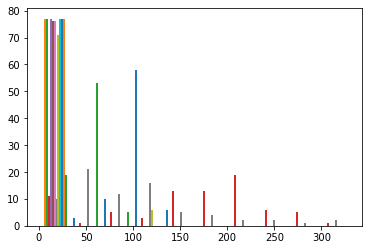

In [4]:
plt.hist(cereal2)

## checking for missing values 

In [5]:
cereal.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

## checking the data types 

In [6]:
cereal.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars      float64
potass      float64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

## Examning the unique values in the columns  

In [7]:
cereal.weight.unique()

array([1.  , 1.33, 1.25, 1.3 , 1.5 , 0.5 , 0.83])

In [8]:
cereal.fiber.unique()

array([10. ,  2. ,  9. , 14. ,  1. ,  1.5,  4. ,  5. ,  0. ,  3. ,  6. ,
        2.7,  2.5])

In [9]:
cereal.type.unique()

array(['C', 'H'], dtype=object)

## dropping the missing rows 

In [10]:
cereal = cereal.dropna()

In [11]:
cereal.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

## b. Compute the mean, median, min, max, and standard deviation for each of the quantitative variables.

In [12]:

statistics = pd.DataFrame({'mean': cereal.mean(),
'sd': cereal.std(),
'min': cereal.min(),
'max': cereal.max(),
'median': cereal.median(),
'length': len(cereal),
})


C:\Users\GBEMISOLA\AppData\Local\Temp\ipykernel_12892\1909337953.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  statistics = pd.DataFrame({'mean': cereal.mean(),
C:\Users\GBEMISOLA\AppData\Local\Temp\ipykernel_12892\1909337953.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'sd': cereal.std(),
C:\Users\GBEMISOLA\AppData\Local\Temp\ipykernel_12892\1909337953.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'median': cereal.median(),


In [13]:
statistics

,mean,sd,min,max,median,length
calories,107.027027,19.843893,50,160,110.000000,74
carbo,14.729730,3.891675,5.0,23.0,14.500000,74
cups,0.821622,0.235715,0.25,1.5,0.750000,74
fat,1.000000,1.006826,0,5,1.000000,74
fiber,2.175676,2.423391,0.0,14.0,2.000000,74
mfr,NaN,NaN,A,R,NaN,74
name,NaN,NaN,100%_Bran,Wheaties_Honey_Gold,NaN,74
potass,98.513514,70.878681,15.0,330.0,90.000000,74
protein,2.513514,1.075802,1,6,2.500000,74
rating,42.371787,14.033712,18.042851,93.704912,40.253086,74


## C. Plot a histogram for each of the quantitative variables. Based on the histograms and summary statistics, answer the following questions

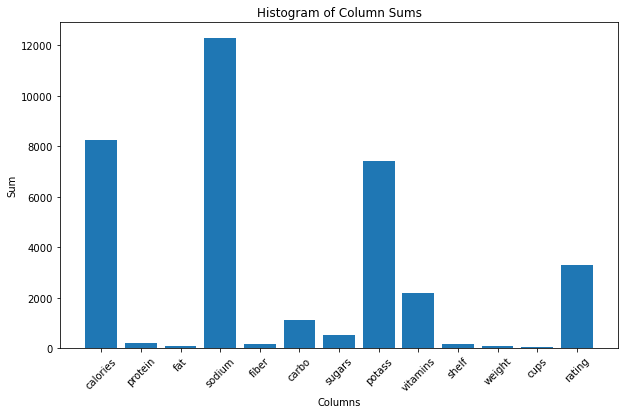

In [14]:
 # Calculate the sum of each column
column_sums = cereal2.sum()

# Plot histogram
plt.figure(figsize=(10,6))
plt.bar(column_sums.index, column_sums.values)
plt.xlabel('Columns')
plt.ylabel('Sum')
plt.title('Histogram of Column Sums')
plt.xticks(rotation=45)
plt.show()

# C.i. Which variables have the largest variability?

In [15]:
# Calculate the standard deviation for each variable
variance_info = cereal2.var()

variance_info

# Create a DataFrame with the variance information
df_var = pd.DataFrame(variance_info, columns=['Variance'])
df_var

,Variance
calories,379.630895
protein,1.198565
fat,1.012987
sodium,7027.853725
fiber,5.680424
carbo,15.267193
sugars,19.172632
potass,4957.657658
vitamins,499.188312
shelf,0.693096


## Plotting the histogram for the variance of the quantitative variables 

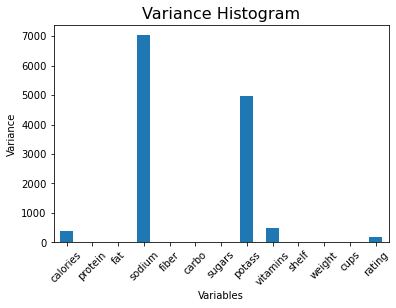

In [16]:
# Plot the histogram
df_var.plot(kind='bar', y='Variance', legend=False)
plt.title(r'Variance Histogram', fontsize=16)
plt.xlabel('Variables')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.show()


>*the variable with the highest variance is the sodium next to it is potash*

# C.ii.  Which variables seem skewed?

In [17]:
# Calculate skewness for each variable
skewness_info = cereal2.skew()

# Print the result
skewness_info
# Create a DataFrame with the variance information
df_skew = pd.DataFrame(skewness_info, columns=['Skewness'])
df_skew

,Skewness
calories,-0.445407
protein,0.745830
fat,1.165989
sodium,-0.575711
fiber,2.431675
carbo,0.112726
sugars,0.044445
potass,1.400355
vitamins,2.463704
shelf,-0.410339


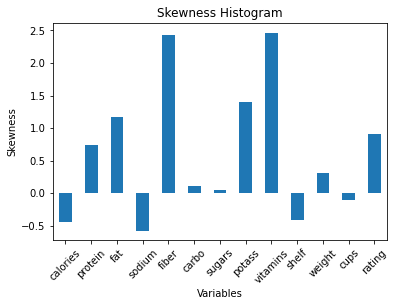

In [18]:
# Plot the histogram
skewness_info.plot(kind='bar', y='Skewness', legend=False)
plt.title('Skewness Histogram')
plt.xlabel('Variables')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()


>*All the variable has atleast (0.1) skewness*

# C.iii. Are there any values that seem extreme?

In [19]:
import numpy as np

# Identify potential outliers using z-scores
z_scores = np.abs((cereal2 - cereal2.mean()) / cereal2.std())

# Set a threshold for considering values as outliers (e.g., z_score > 3)
outliers = (z_scores > 3)

# Print the result
outliers.sum()


calories    0
protein     2
fat         1
sodium      0
fiber       2
carbo       0
sugars      0
potass      2
vitamins    6
shelf       0
weight      4
cups        0
rating      1
dtype: int64

>*Answer: Yes* 

In [20]:
cereal2.head(2)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679


In [21]:
cereal.head(2)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679


# Plotting a side-by-side boxplot comparing the calories in hot vs. cold cereals.

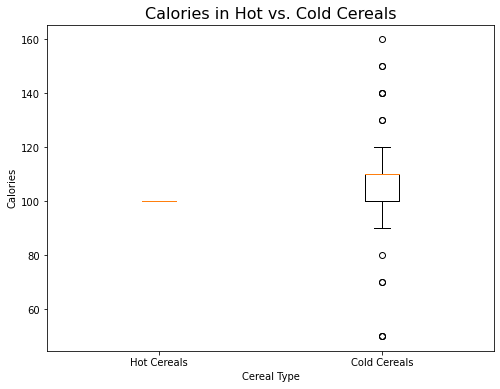

In [22]:
# Create a side-by-side boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([cereal[cereal['type'] == 'H']['calories'], cereal[cereal['type'] == 'C']['calories']],
            labels=['Hot Cereals', 'Cold Cereals'])
plt.title(r'Calories in Hot vs. Cold Cereals', fontsize=16)
plt.xlabel('Cereal Type')
plt.ylabel('Calories')
plt.show()


### counting the number of occurrence of hot and cold calories

In [23]:
(cereal['type'] == 'C').sum()

73

In [24]:
(cereal['type'] == 'H').sum()

1

#  Correlation table for the quantitative variable

In [25]:
# Compute the correlation table
correlation_table = cereal2.corr()

# Print the result
correlation_table


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.257638,0.566533,-0.072063,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.025012,-0.291853,0.563706,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.300003,0.302497,0.200445,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.297687,0.058866,-0.042632,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.380357,-0.138760,0.911528,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.257638,-0.025012,-0.300003,0.297687,-0.380357,1.000000,-0.471184,-0.365003,0.219202,-0.192650,0.138467,0.367460,0.088712
sugars,0.566533,-0.291853,0.302497,0.058866,-0.138760,-0.471184,1.000000,0.001414,0.098231,0.068377,0.455844,-0.048961,-0.763902
potass,-0.072063,0.563706,0.200445,-0.042632,0.911528,-0.365003,0.001414,1.000000,-0.005427,0.385784,0.419933,-0.501607,0.416009
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.219202,0.098231,-0.005427,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.192650,0.068377,0.385784,0.299262,1.000000,0.190762,-0.335269,0.025159


# Matrix plot for Quantitative Variables

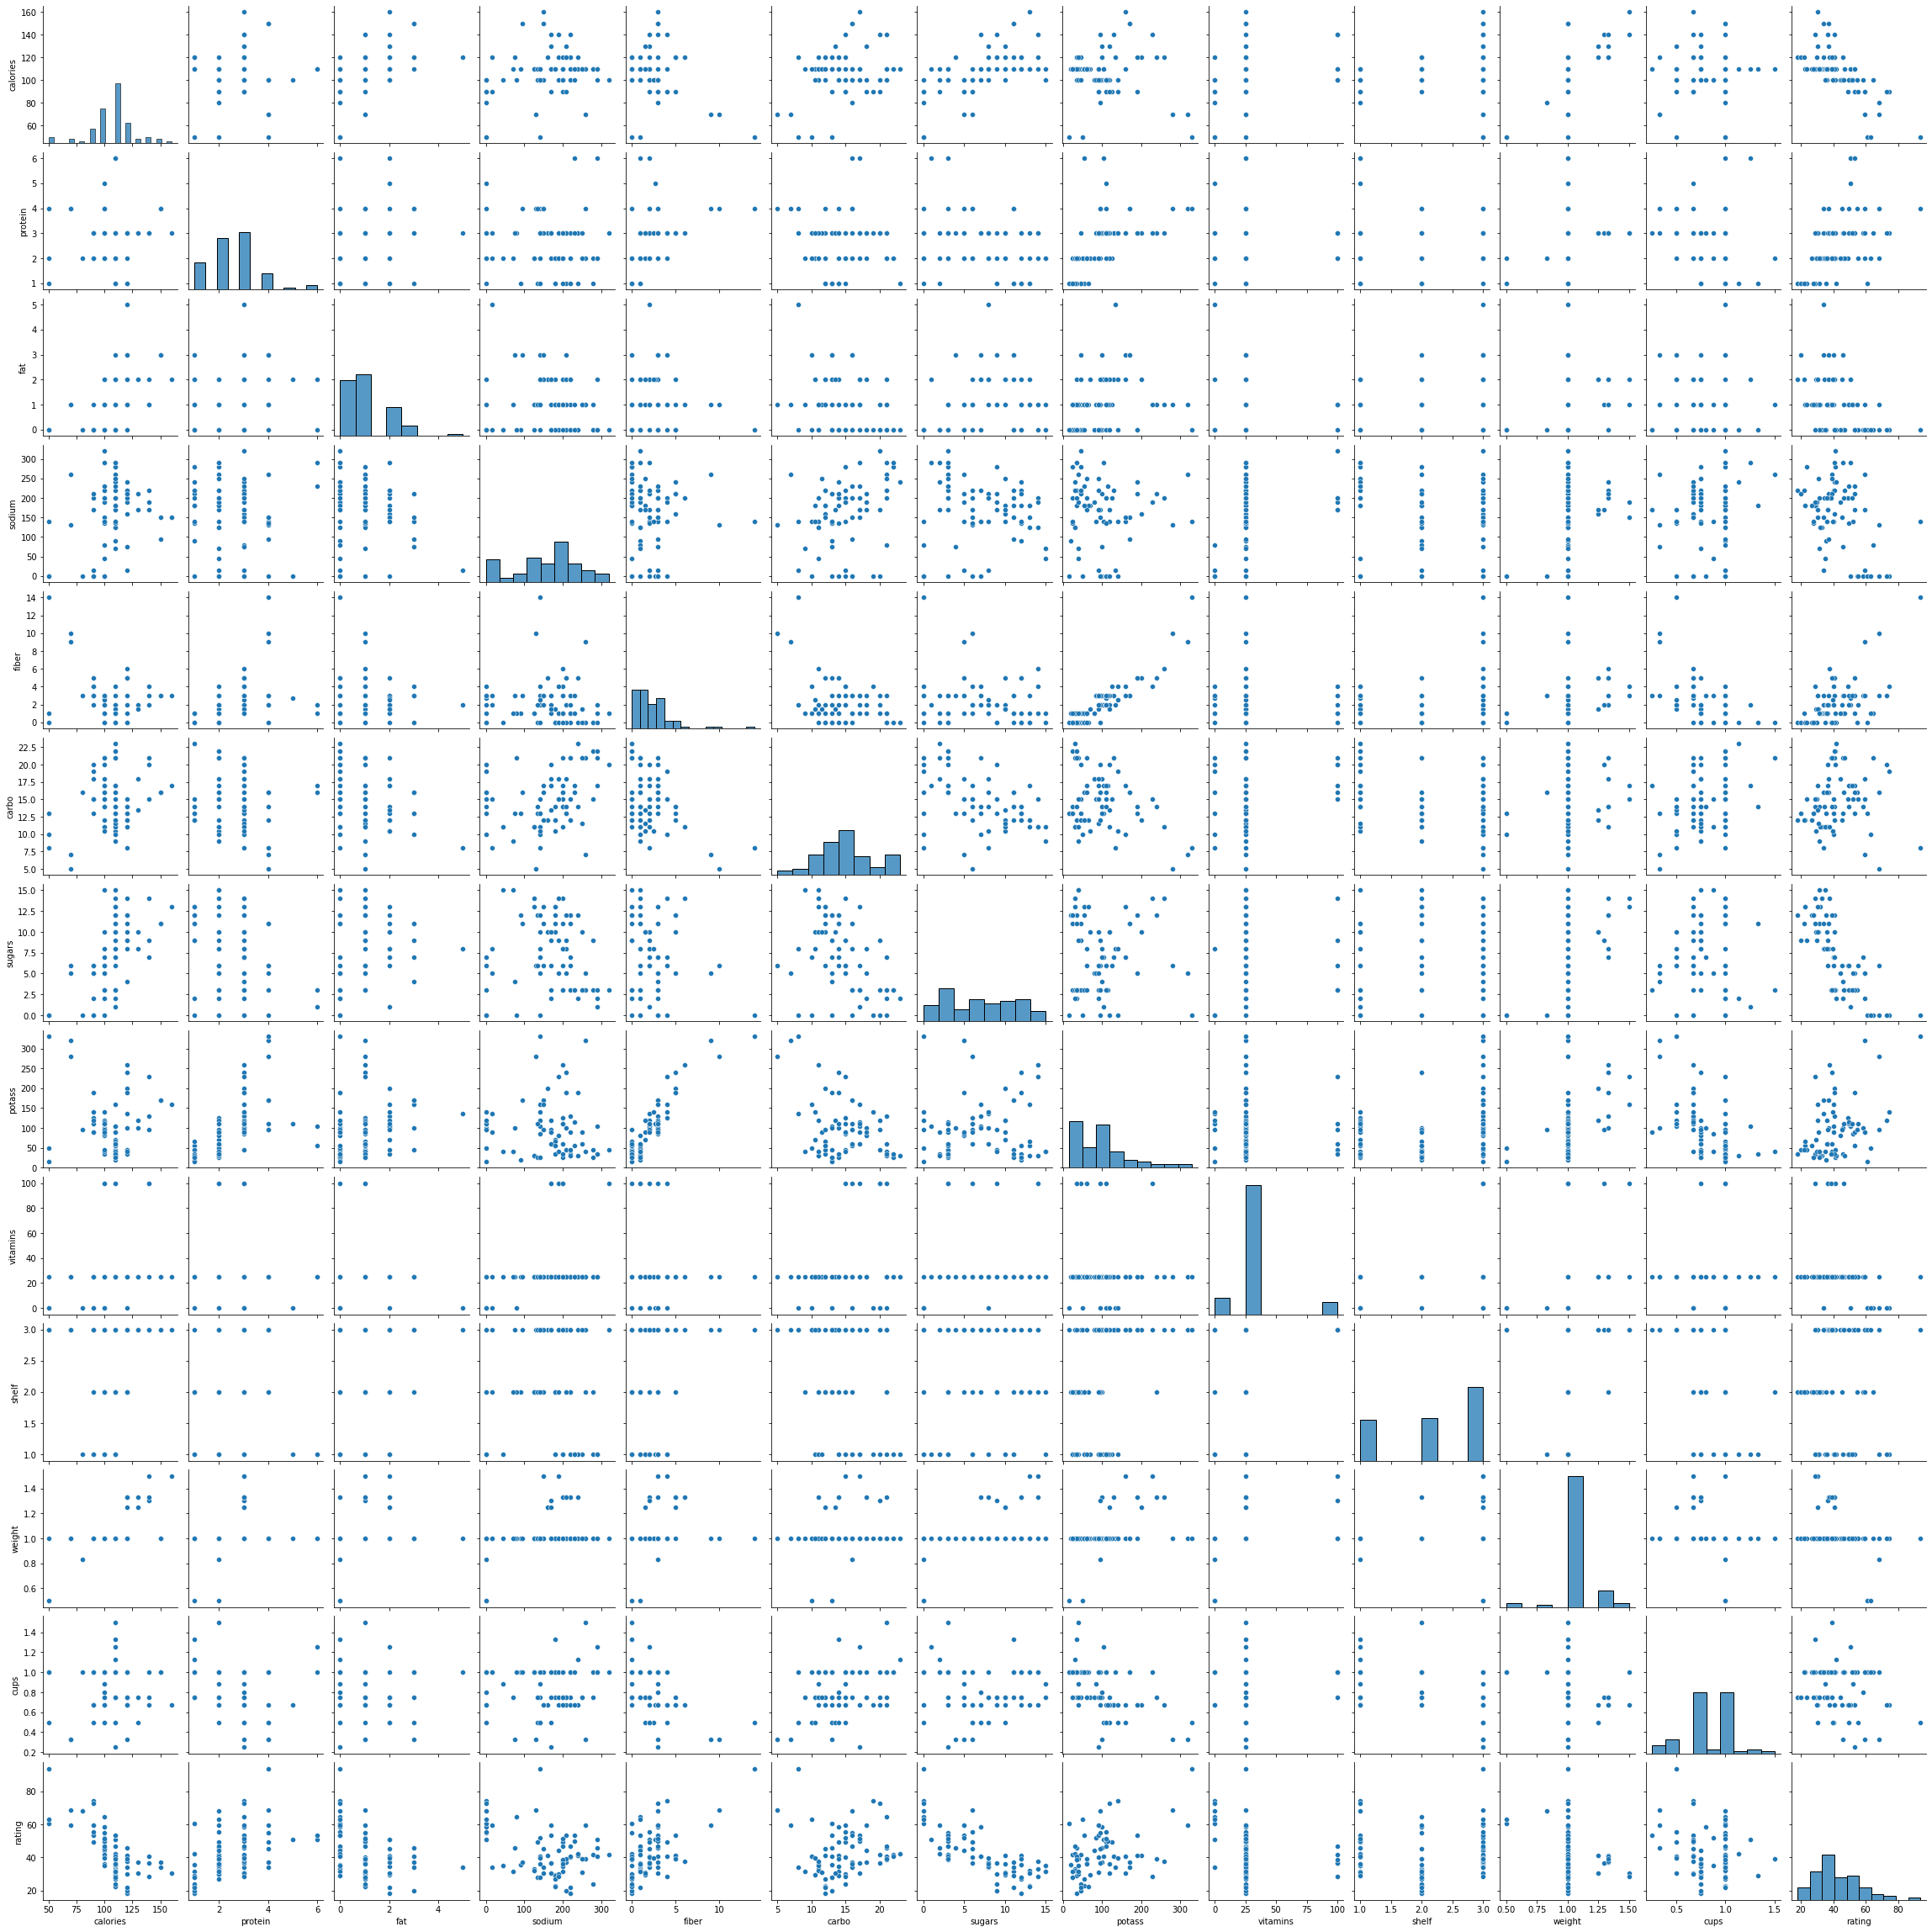

In [26]:
# Create a matrix plot using seaborn
sns.pairplot(cereal2)
plt.show()


In [27]:
# Identify highly correlated variables
high_corr_vars = set()
threshold = 0.7
for i in range(len(correlation_table.columns)):
    for j in range(i):
        if abs(correlation_table.iloc[i, j]) > threshold:
            colname = correlation_table.columns[i]
            high_corr_vars.add(colname)


In [28]:
# Drop highly correlated variables
cereal2_reduced = cereal2.drop(columns=high_corr_vars)

In [30]:
cereal2_reduced

,calories,protein,fat,sodium,fiber,carbo,sugars,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6.0,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8.0,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5.0,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0.0,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8.0,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3.0,25,3,1.0,0.75
73,110,1,1,140,0.0,13.0,12.0,25,2,1.0,1.00
74,100,3,1,230,3.0,17.0,3.0,25,1,1.0,0.67
75,100,3,1,200,3.0,17.0,3.0,25,1,1.0,1.00


In [31]:
cereal2.isnull().sum()

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [32]:
cereal2 = cereal2.dropna()

In [33]:
from sklearn.decomposition import PCA

# Assuming df is your original DataFrame
pca = PCA(n_components=2)
cereal2_reduced = pd.DataFrame(pca.fit_transform(cereal2), columns=['PCA1', 'PCA2'])

# Question  2 - University Rankings

The dataset on American college and university rankings (available from www.dataminingbook.com) contains information on 1302 American colleges and universities offering an undergraduate program. For each university, there are 17 measurements that include continuous measurements (such as tuition and graduation rate) and categorical measurements (such as location by state and whether it is a private or a public school). 

a. Remove all categorical variables. Then remove all records with missing numerical measurements from the dataset.

b. Conduct a principal components analysis on the cleaned data and comment on the results. Should the data be normalized?

Discuss what characterizes the components you consider key.


In [34]:
uni = pd.read_csv('Universities.csv')
uni.head(5)

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


### Removing the Categorical Variables & dropping NaN

In [35]:
columns_to_drop = ['College Name','State', 'Public (1)/ Private (2)']
uni_2 = uni.drop(columns=columns_to_drop)

In [36]:
uni_2 = uni_2.dropna()

In [37]:
uni_2.isnull().sum()

# appli. rec'd              0
# appl. accepted            0
# new stud. enrolled        0
% new stud. from top 10%    0
% new stud. from top 25%    0
# FT undergrad              0
# PT undergrad              0
in-state tuition            0
out-of-state tuition        0
room                        0
board                       0
add. fees                   0
estim. book costs           0
estim. personal $           0
% fac. w/PHD                0
stud./fac. ratio            0
Graduation rate             0
dtype: int64

In [38]:
uni_2.head(2)

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
2,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0


In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
uni_2_standardized = scaler.fit_transform(uni_2)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(uni_2_standardized)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_


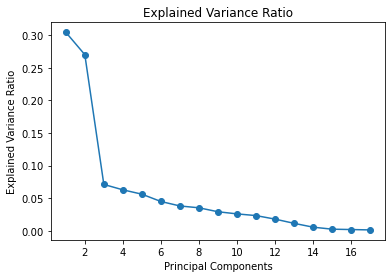

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.553445,-1.451425,2.012250,-0.387954,0.099729,-0.377751,1.381073,-0.744832,0.290259,-1.093758,-1.727051
1,-2.588311,-1.865885,1.447236,0.858912,-1.035804,-0.626941,-0.348900,-1.193035,0.302318,-0.662276,0.580262
2,1.828838,-1.002319,-1.131510,-1.445886,-0.314751,0.275238,0.561364,0.104386,0.236910,-1.280312,0.769124
3,-0.902719,-1.726872,0.199135,-0.466241,-0.580731,-0.290870,0.212716,-0.337600,0.986932,-0.910759,-0.783036
4,-1.686585,-0.432867,1.350667,-1.031226,2.236993,1.387569,0.270662,-0.948632,0.512370,-0.374494,-0.359649
...,...,...,...,...,...,...,...,...,...,...,...
466,-2.316781,2.370036,-2.652243,0.338346,0.572098,-0.541132,-0.013009,-0.017773,-0.207020,0.293330,0.196924
467,-1.156027,-2.191855,0.618487,-0.448757,-0.428504,-0.663927,-0.952714,-0.987287,0.562975,-0.154620,-0.110511
468,-1.272203,-1.874977,1.286728,-0.890900,0.121396,0.028052,-1.115783,-0.556457,0.791218,-0.100863,0.071480
469,-1.948289,2.057935,0.699836,-0.282505,0.149245,0.526731,0.819496,-0.220108,-0.130520,-0.177862,-0.188907


In [40]:
# Plotting the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Select the number of principal components based on the explained variance ratio
# You can choose a threshold (e.g., 0.95) to determine the number of components to keep
cumulative_variance = explained_variance_ratio.cumsum()
num_components_to_keep = sum(cumulative_variance < 0.95) + 1

# Apply PCA with the selected number of components
pca_selected = PCA(n_components=num_components_to_keep)
principal_components_selected = pca_selected.fit_transform(uni_2_standardized)

# Create a DataFrame with the principal components
uni_pca = pd.DataFrame(data=principal_components_selected, columns=[f'PC{i}' for i in range(1, num_components_to_keep + 1)])

# Print the DataFrame with principal components
uni_pca


# Question 3 -  Sales of Toyota Corolla Cars.

The file ToyotaCorolla.csv contains data on used cars (Toyota Corollas) on sale during late summer of 2004 in the Netherlands. It has 1436 records containing details on 38 attributes, including Price, Age, Kilometers, HP, and other specifications. The goal will be to predict the price of a used Toyota Corolla based on its specifications.

a. Identify the categorical variables.

b. Explain the relationship between a categorical variable and the series of binary dummy variables derived from it.

c. How many dummy binary variables are required to capture the information in a categorical variable with N categories?

d. Use Python to convert the categorical variables in this dataset into dummy variables, and explain in words, for one record, he values in the derived binary dummies.

e. Use Python to produce a correlation matrix and matrix plot.

Comment on the relationships among variables.

In [41]:
corolla = pd.read_csv('ToyotaCorolla.csv')

corolla.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0


## a. Identifying Categorical Varibales

In [42]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


>*The categorical varibales are as follows: 
    1. Model
    2. Fuel Type
    3. Color*

## b. Explain the relationship between a categorical variable and the series of binary dummy variables derived from it

>*The relationship between a categorical variable and the series of binary dummy variables derived from it is known as "dummy coding" or "one-hot encoding." This process is a way to represent categorical variables as binary (0 or 1) variables, making them suitable for use in various machine learning algorithms and statistical models.*

>*Here's how dummy coding works:*

>*Original Categorical Variable:
Consider a categorical variable with k distinct categories. For example, a variable "Color" with categories: Red, Blue, Green.*

>*Dummy Coding:
Dummy coding involves creating 1 k−1 binary (dummy) variables, each representing one category. Each dummy variable is assigned a value of 1 if the observation belongs to that category and 0 otherwise. The omitted category (the one not represented by any dummy variable) serves as the reference category.*

>*For example, if we create dummy variables for the "Color" variable:*

>*Dummy variable 1 (Blue): 1 if Color=Blue, 0 otherwise.*
>*Dummy variable 2 (Green): 1 if Color=Green, 0 otherwise.
The omitted category (Red) is implicitly represented when both dummy variables are 0.

>*Relationship:
The relationship between the original categorical variable and its dummy variables is straightforward:*

>*If the original categorical variable has k categories, there will be  k−1 dummy variables.
The sum of all dummy variables for each observation is always 1 because each observation falls into exactly one category.
For example, if the original categorical variable is "Color" and an observation has Color=Blue, the dummy variables would be (Blue=1, Green=0), and the sum of the dummy variables is 1.*

>*Use in Modeling:
Dummy coding is useful when incorporating categorical variables into statistical models or machine learning algorithms. Models often require numerical inputs, and dummy coding provides a way to represent categorical information in a numeric form without imposing an ordinal relationship among the categories.*

>*For instance, in linear regression, each dummy variable contributes a unique intercept or slope to the model, allowing for different average values for each category.*

## C. How many dummy binary variables are required to capture the information in a categorical variable with N categories?

>*To capture the information in a categorical variable with N categories using dummy binary variables, you typically need N−1 dummy variables. This is known as "dummy coding" or "one-hot encoding."*

>*Here's why N−1 dummy variables are used:*

>*Redundancy and Linear Dependence:
If you create N dummy variables, you introduce perfect multicollinearity into your dataset because the sum of the N dummy variables will always be constant (1 for each observation). This creates a linearly dependent set of variables, making it impossible to uniquely estimate the coefficients in linear models.*

>*Reference Category:
By using N−1 dummy variables, you implicitly create a reference category. The omitted category serves as the baseline or reference against which the other categories are compared. The information about the omitted category is captured implicitly by the N−1 dummy variables.*

>*For example, if you have a categorical variable with three categories (A, B, C), you would create two dummy variables (B, C), and the information about category A is captured when both B and C are 0.*

>*In general, if a categorical variable has N categories, you create N−1 dummy variables to represent those categories. This is a standard practice to avoid multicollinearity issues and to ensure that the information in the categorical variable is properly captured.*

## d. Use Python to convert the categorical variables in this dataset into dummy variables, and explain in words, for one record, the values in the derived binary dummies.

In [43]:
# Convert categorical variables to dummy variables
dummies_model = pd.get_dummies(corolla['Model'], prefix='Model', drop_first=True)
dummies_fuel_type = pd.get_dummies(corolla['Fuel_Type'], prefix='Fuel_Type', drop_first=True)
dummies_color = pd.get_dummies(corolla['Color'], prefix='Color', drop_first=True)

# Concatenate dummy variables with the original DataFrame
corolla_encoded = pd.concat([corolla, dummies_model, dummies_fuel_type, dummies_color], axis=1)

# Display the result
corolla_encoded.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,0,0,1,0,0,0,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,0,0,0,0,0,1,0,0,0


## e. Use Python to produce a correlation matrix and matrix plot.

In [44]:
# Compute the correlation table
correlation_matrix = corolla_encoded.corr()

# Print the result
correlation_matrix

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,...,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,0.163764,-0.023022,-0.000585,0.081231,-0.102522,0.065942,-0.037468,0.000755,0.037080,-0.044680
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,-0.038516,0.034896,0.014431,-0.104963,0.169947,-0.103803,0.028562,-0.016848,-0.103360,0.022726
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,0.092611,-0.019399,-0.032955,0.103530,-0.137660,0.098365,-0.028550,0.017916,0.050933,-0.040883
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,-0.049646,0.008067,0.057279,-0.030403,-0.031214,0.008646,-0.017838,-0.028353,-0.001445,0.001609
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,-0.084162,0.018052,0.022763,-0.098638,0.144152,-0.100526,0.031958,-0.012880,-0.050977,0.040837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Color_Red,0.065942,-0.103803,0.098365,0.008646,-0.100526,0.052190,0.011700,-0.261828,-0.026799,-0.008865,...,-0.003810,-0.191911,-0.242743,-0.208407,-0.252321,1.000000,-0.149297,-0.025896,-0.072780,-0.022418
Color_Silver,-0.037468,0.028562,-0.028550,-0.017838,0.031958,0.006113,0.014300,0.104902,0.045772,-0.001351,...,-0.010670,-0.119348,-0.150960,-0.129607,-0.156916,-0.149297,1.000000,-0.016104,-0.045261,-0.013942
Color_Violet,0.000755,-0.016848,0.017916,-0.028353,-0.012880,0.018810,-0.012359,0.036691,-0.012837,-0.015804,...,0.019496,-0.020701,-0.026184,-0.022480,-0.027217,-0.025896,-0.016104,1.000000,-0.007851,-0.002418
Color_White,0.037080,-0.103360,0.050933,-0.001445,-0.050977,0.130403,-0.093928,-0.203738,-0.036079,0.027304,...,-0.122290,-0.058180,-0.073590,-0.063181,-0.076494,-0.072780,-0.045261,-0.007851,1.000000,-0.006796


In [ ]:
# Create a matrix plot using seaborn
sns.pairplot(corolla_encoded)
plt.show()

# Question 4 -  Chemical Features of Wine.

Table 4.14 shows the PCA output on data (non-normalized) in which the variables represent chemical characteristics of wine, and each case is a different wine.

a. The data are in the file Wine.csv. Consider the rows labeled “Proportion of Variance.” Explain why the value for PC1 is so much greater than that of any other column.

b. Comment on the use of normalization (standardization) in
part (a).


## a. - Explain why the value of PC1 is so much greater than that of any other column

The proportion of variance, often expressed as a percentage, is a statistical measure that indicates the amount of variability in a set of data that can be attributed to a particular factor or variable. In various statistical techniques, the proportion of variance is used to assess the relative importance of different factors in explaining the observed variability.

One common context where this concept is used is in analysis of variance (ANOVA) and regression analysis. In ANOVA, the proportion of variance is often represented by the R-squared statistic, which indicates the proportion of total variability in the dependent variable that is explained by the independent variables. In regression analysis, R-squared is commonly used to measure the proportion of variance in the dependent variable that is predictable from the independent variables.


This value ranges from 0 to 1, and a higher R-squared indicates a better fit of the model to the data. It's important to note that correlation does not imply causation, and a high R-squared value does not necessarily mean that the relationship is causal.

In summary, the proportion of variance is a valuable measure in statistics, providing insights into the degree to which a particular factor or model accounts for the observed variability in a dataset.

>* PC1 = 0.9981 is more grater than that of other column because it produces a more fit for the 0.99 means that 99% of the variability in the dependent variable is accounted for by the independent variables in the model.*

## b.  Comment on the use of normalization (standardization) in part (a).

Normalizing the features is crucial in PCA to give all features an equal opportunity to contribute to the principal components without being dominated by the scale of any one feature.